## Prepare the environment

### Import necessary packages

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
np.warnings.filterwarnings("ignore")

### Mount Google drive, we will be using GDrive for processing
Files will be present in "/content/drive/My Drive".

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## Preprocessing

### Process dataset
!! NOTE: Change your data_path appropriately

In [5]:
# Import dataset
data_path = '/content/drive/MyDrive/DataScienceConsulting/'
df = pd.read_excel(data_path + 'Final Assignment - Week 9.xlsx').drop(['Unnamed: 66', 'Unnamed: 67', 'Dear Greg,'], axis = 1)

In [6]:
df.head(5)

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [7]:
# Get rid of null transaction
df = df[(df['r'] > 0) & (df['f'] > 0) & (df['m'] > 0)]
df.head(5)

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [8]:
df.shape

(32822, 66)

### EDA

In [9]:
total_sum = df[['r','f','m']].rename(columns = {'r': 'recency','f':'frequency','m':'monetary'}).describe().T
metric = ['mean','std','min','50%','max']
summary = total_sum[metric]
summary

,mean,std,min,50%,max
recency,512.251478,543.715784,1.0,298.000000,2460.0
frequency,5.960331,7.049262,1.0,4.000000,118.0
monetary,258.763170,3982.693859,1.0,107.049927,532892.0


### Histogram

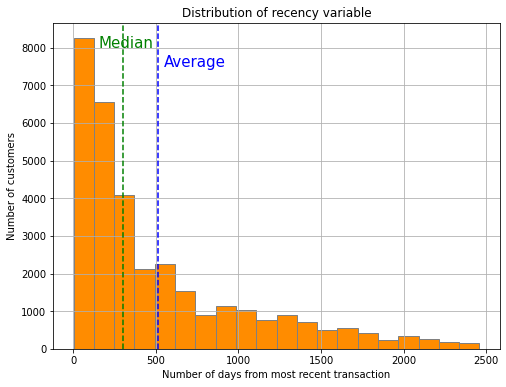

In [10]:
# Recency (var: r)
r = df['r']
r_mean = df['r'].mean()
r_median = df['r'].median()

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.hist(r, bins = 20, color = 'darkorange', edgecolor = 'grey')
ax.grid()
ax.set_xlabel("Number of days from most recent transaction")
ax.set_ylabel("Number of customers")
ax.set_title("Distribution of recency variable")
plt.axvline(x = r_mean,  label = 'mean recency value',color='blue',ls='--')
plt.text(550,7500,'Average',fontsize=15,color='blue')
plt.axvline(x = r_median,  label = 'median recency value',color='green',ls='--')
plt.text(150,8000,'Median',fontsize=15,color='green')
# plt.legend()
plt.show()

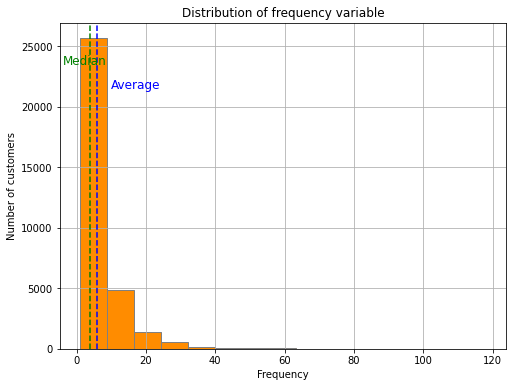

In [11]:
# Frequency
f = df['f']
f_mean = df['f'].mean()
f_median = df['f'].median()

fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.hist(f, bins = 15, color = 'darkorange', edgecolor = 'grey')
ax.grid()
ax.set_xlabel("Frequency")
ax.set_ylabel("Number of customers")
ax.set_title("Distribution of frequency variable")
plt.axvline(x = f_mean,  label = 'mean frequency value',color='blue',ls='--')
plt.text(10,21500,'Average',fontsize=12,color='blue')
plt.axvline(x = f_median,  label = 'median frequency value',color='green',ls='--')
plt.text(-4,23500,'Median',fontsize=12,color='green')
# plt.legend()
plt.show()

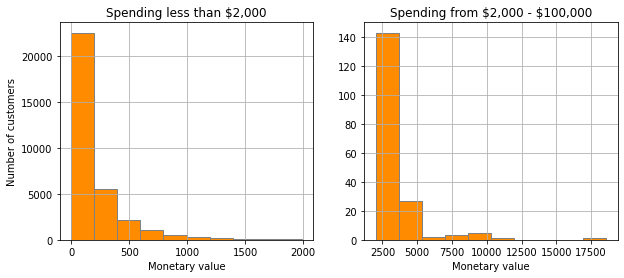

In [12]:
# Monetary value 
# Eliminate outliers (for better visualization)
m1 = df[df['m'] <= 2000].m
m2 = df[(df['m'] <= 100000) & (df['m'] >= 2000)].m

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].hist(m1, bins = 10, color = 'darkorange', edgecolor = 'grey')
ax[1].hist(m2, bins = 10, color = 'darkorange', edgecolor = 'grey')
ax[0].grid()
ax[1].grid()

ax[0].set_xlabel("Monetary value")
ax[1].set_xlabel("Monetary value")
ax[0].set_ylabel("Number of customers")

ax[0].set_title("Spending less than \$2,000")
ax[1].set_title("Spending from \$2,000 - \$100,000")

plt.show()

## Customer Segmentation

In [13]:
df_test = df[['id','r','f','m']].copy()

In [14]:
# Identify business transactions (outliers)
df_test['m_per_trans'] = df_test['m']/df_test['f']
df_b2b = df_test[df_test['m_per_trans'] >= 4000]

# Consider individual transactions 
df_ind =  df_test[df_test['m_per_trans'] < 4000]
df_ind

,id,r,f,m,m_per_trans
0,914,194,7,318.894775,45.556396
1,957,3,14,368.052246,26.289446
2,1406,1489,15,423.298340,28.219889
3,1414,155,4,71.217041,17.804260
4,1546,194,6,442.638184,73.773031
...,...,...,...,...,...
33705,16060393,9,1,29.799988,29.799988
33706,16060962,9,1,14.949997,14.949997
33707,16061233,6,1,34.849976,34.849976
33710,16062981,5,1,22.949997,22.949997


In [15]:
# Identify quantiles for each metric
quantiles = df_ind.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'id': {0.25: 4354938.75, 0.5: 7936483.5, 0.75: 11857563.25},
 'r': {0.25: 123.0, 0.5: 298.0, 0.75: 717.0},
 'f': {0.25: 2.0, 0.5: 4.0, 0.75: 8.0},
 'm': {0.25: 43.849975586, 0.5: 107.02862548499999, 0.75: 253.63760375750002},
 'm_per_trans': {0.25: 18.891650390287502,
  0.5: 28.27528450693182,
  0.75: 43.306396484}}

In [16]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [17]:
# Calculate quantile for each metric
df_ind['r_quantile'] = df_ind['r'] \
                            .apply(RScore, args = ('r', quantiles,))
df_ind['f_quantile'] = df_ind['f'] \
                            .apply(FMScore, args = ('f', quantiles,))
df_ind['m_quantile'] = df_ind['m'] \
                            .apply(FMScore, args = ('m', quantiles,))

# Calculate RFM Score 
df_ind['rfm_score'] = df_ind.r_quantile.map(str) \
                            + df_ind.f_quantile.map(str) \
                            + df_ind.m_quantile.map(str)
df_ind.head(5)

,id,r,f,m,m_per_trans,r_quantile,f_quantile,m_quantile,rfm_score
0,914,194,7,318.894775,45.556396,3,3,4,334
1,957,3,14,368.052246,26.289446,4,4,4,444
2,1406,1489,15,423.298340,28.219889,1,4,4,144
3,1414,155,4,71.217041,17.804260,3,2,2,322
4,1546,194,6,442.638184,73.773031,3,3,4,334


In [18]:
# Identify different mutually exclusive customer groups
df_ind['cust_type'] = 'Non-specific'

df_ind['cust_type'][(df_ind['r_quantile'] == 4) & \
                    ((df_ind['f_quantile'] == 4) | (df_ind['f_quantile'] == 3))] = 'Best Customer'

df_ind['cust_type'][(df_ind['r_quantile'] == 4) & \
                    ((df_ind['f_quantile'] == 1) | (df_ind['f_quantile'] == 2))] = 'Fresh Potential'

df_ind['cust_type'][(df_ind['r_quantile'] < 4) & \
                    ((df_ind['f_quantile'] == 4) | (df_ind['f_quantile'] == 3)) & \
                    ((df_ind['m_quantile'] == 4))] = 'Past Loyal'


In [19]:
df_tmp = df_ind[['m','rfm_score','cust_type']] \
            .groupby(['rfm_score','cust_type']).sum('m') \
            .rename(columns = {'m': 'revenue'})  \
            .sort_values(by = 'revenue', ascending = False)
df_tmp

,,revenue
rfm_score,cust_type,
444,Best Customer,1.971836e+06
344,Past Loyal,9.703461e+05
244,Past Loyal,7.236981e+05
144,Past Loyal,2.924775e+05
234,Past Loyal,2.134253e+05
134,Past Loyal,2.037580e+05
334,Past Loyal,2.006547e+05
434,Best Customer,1.950217e+05
433,Best Customer,1.662802e+05


In [20]:
df_ind[['rfm_score','cust_type']].drop_duplicates().sort_values(by ='rfm_score', ascending = False)

,rfm_score,cust_type
1,444,Best Customer
8,443,Best Customer
1399,442,Best Customer
46,434,Best Customer
7,433,Best Customer
81,432,Best Customer
1624,431,Best Customer
1187,424,Fresh Potential
50,423,Fresh Potential
44,422,Fresh Potential


In [21]:
df_count_by_type = df_ind.groupby('cust_type')['r'].count().reset_index()
df_count_by_type['pct_count'] = round(df_count_by_type['r']/32818*100,2)
df_count_by_type = df_count_by_type.rename(columns = {'r':'count'})
df_count_by_type

,cust_type,count,pct_count
0,Best Customer,4883,14.88
1,Fresh Potential,3365,10.25
2,Non-specific,19981,60.88
3,Past Loyal,4589,13.98


In [22]:
df_rev_by_type = df_ind.groupby('cust_type')['m'].sum().reset_index()
df_rev_by_type = df_rev_by_type.rename(columns = {'m':'revenue'})
tot_rev = df_rev_by_type.revenue.sum()
df_rev_by_type['pct_rev'] = round(df_rev_by_type['revenue']/tot_rev*100,2)
df_rev_by_type

,cust_type,revenue,pct_rev
0,Best Customer,2.466429e+06,34.37
1,Fresh Potential,2.669390e+05,3.72
2,Non-specific,1.838728e+06,25.62
3,Past Loyal,2.604360e+06,36.29


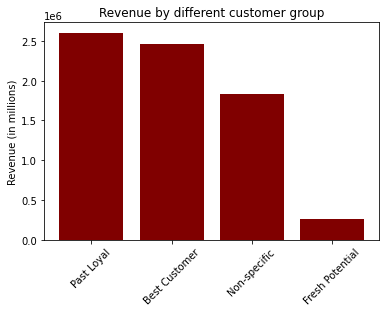

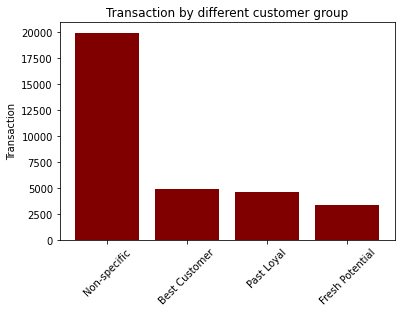

In [23]:
# Revenue for each group
# df_plot = df_ind[df_ind['cust_type'] != 'Non-specific']
df_plot = df_ind
df_rfm_rev = df_plot.groupby('cust_type')['m']\
                    .sum('m') \
                    .reset_index() \
                    .sort_values(by = 'm', ascending = False) \
                    .rename(columns = {'m': 'revenue'})

# Count number of transaction for each group 
df_rfm_freq = df_plot.groupby('cust_type')['f']\
                    .count() \
                    .reset_index() \
                    .sort_values(by = 'f', ascending = False) \
                    .rename(columns = {'f': 'n_transaction'})

df_rfm = pd.merge(df_rfm_rev, df_rfm_freq, on = 'cust_type')

# Plot revenue 

plt.bar(df_rfm.cust_type, df_rfm['revenue'], color = 'maroon')
plt.xticks(rotation = 45)
plt.ylabel('Revenue (in millions)')
plt.title('Revenue by different customer group')
plt.show()

# Plot transaction 
df_rfm = df_rfm.sort_values(by = 'n_transaction', ascending = False)
plt.bar(df_rfm['cust_type'], df_rfm['n_transaction'], color = 'maroon')
plt.xticks(rotation = 45)
plt.ylabel('Transaction')
plt.title('Transaction by different customer group')
plt.show()

In [24]:
df_ind.f.sum()

195567

In [25]:
df_ind.m.sum()

7176455.265876841

In [26]:
df_b2b

,id,r,f,m,m_per_trans
8172,5405602,191,18,383349.500,21297.194444
9044,5900190,69,11,532892.000,48444.727273
13833,8192553,23,31,147684.875,4764.028226
22192,14158205,90,3,252743.125,84247.708333


In [27]:
df_b2b.m.sum()

1316669.5